# Курсовой проект

## А. Зырянов

## Теория вероятностей и математическая статистика.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import Panel
import seaborn as sns
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import warnings
warnings.filterwarnings('ignore')

### Задача

Мистер Смит готовится написать аналитический отчет по компании __`ExxonMobil`__, одной из крупнейших компаний по переработке нефтегаза. В своем анализе Смит хочет привести чувствительность доходности акционерного капитала к различным экономичемким факторам. Например, как-то раз клиент спросил Смита как соотносится стоимость акций компании с изменением розничных цен на энергоресурсы. Смит полагает, что с изменением розничной цены, цена на акции компании движется в противоположном направлении. Но при этом он не знает насколько сильно два показателя взаимосвязаны. Смит говорит своей помощнице, знойной блондинке Бет, изучить ежеквартальную доходность на акции препарируемой компании относительно изменения в индексах __`CPIENG`__ и __`PPIСME`__ за квартал. Бет хочет сделать корреляционный и регрессионный анализы. Она подготовила данные за 100 кварталов: 

1. Средняя ежеквартальная доходность на акции, средняя по CPIENG и PPICME
2. Стандартное отклонение
3. Коваривция с CPIENG
4. Ковариация с PPICME
5. Ковариация между CPIENG и PPICME
6. Корреляция между компанией и CPIENG
7. Multiple R
8. R-squared
9. SEE
10. Intercept

1. Бет хочет определить является ли корреляция между нашими нефтегазовыми друзьями и CPIENG статистически надежной с 95% уверенностью.
2. Если внезапно CPIENG обрушится на 1%, то как сильно разбогатеют акционеры нашей компании?
3. Что нам говорит коэфф. детерменированности в модели, которую построила Бет?
4. Что является некорректным из следующих утверждений, исходя из анализа Бет: ???

__Решение:__

In [2]:
read_file = pd.read_excel (r'C:/Users/Alex/Documents/ROE_CPI_PPI_norm.xls')
read_file.to_csv (r'C:/Users/Alex/Documents/ROE_CPI_PPI_norm.csv', index = None, header=True)

R_model = pd.read_csv('C:/Users/Alex/Documents/ROE_CPI_PPI_norm.csv', encoding = 'cp1251')
R_model.head()

,DATE,ROE,CPI_CHANGE,PPI_CHANGE
0,1994-10-01,0.0767,-0.024333,0.010
1,1995-01-01,0.0927,-0.017000,-0.010
2,1995-04-01,0.0975,0.028000,0.076
3,1995-07-01,0.1100,0.007333,-0.077
4,1995-10-01,0.1233,-0.037000,0.000


In [3]:
X = R_model[['CPI_CHANGE', 'PPI_CHANGE']]
Y = R_model[['ROE']]

X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6731
Date:                Sat, 07 Dec 2019   Prob (F-statistic):              0.512
Time:                        01:03:49   Log-Likelihood:                 105.88
No. Observations:                 100   AIC:                            -205.8
Df Residuals:                      97   BIC:                            -198.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2066      0.009     24.114      0.0

In [4]:
ROE = R_model[['ROE']].values.T
CPI_index = R_model[['CPI_CHANGE']].values.T
PPI_index = R_model[['PPI_CHANGE']].values.T

### 1. Средняя ежеквартальная доходность на акции, средняя по CPIENG и PPICME

In [5]:
ROE_mean = np.mean(ROE)
CPI_index_mean = np.mean(CPI_index)
PPI_index_mean = np.mean(PPI_index)
print(f'Средняя по акциям = {ROE_mean}, средняя по CPIENG = {CPI_index_mean}, средняя по PPICME = {PPI_index_mean}')

Средняя по акциям = 0.20741800000000002, средняя по CPIENG = 0.01104626666666667, средняя по PPICME = 0.01242999999999999


### 2. Стандартное отклонение

In [6]:
ROE_std = np.std(ROE)
CPI_index_std = np.std(CPI_index)
PPI_index_std = np.std(PPI_index)
print(f'Стандартное отклонение по акциям = {ROE_std}, по CPIENG = {CPI_index_std}, по PPICME = {PPI_index_std}')

Стандартное отклонение по акциям = 0.08451090388819658, по CPIENG = 0.1269099091422993, по PPICME = 0.3549968522395656


### 3. Ковариация с CPIENG

In [7]:
cov_ROE_CPI = np.cov(ROE, CPI_index)[0][1]
cov_ROE_CPI

0.0012601396065993265

### 4. Ковариация с PPICME

In [8]:
cov_ROE_PPI = np.cov(ROE, PPI_index)[0][1]
cov_ROE_PPI

0.003059698242424242

### 5. Ковариация между CPIENG и PPICME

In [9]:
cov_CPI_PPI = np.cov(CPI_index, PPI_index)[0][1]
cov_CPI_PPI

0.0365698109818182

### 6. Корреляция между компанией и CPIENG

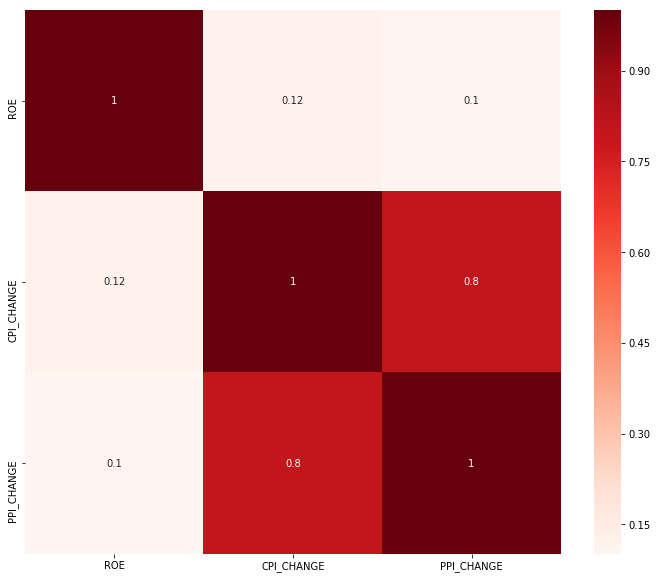

In [10]:
plt.figure(figsize=(12,10))
cor = R_model.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
print(R_model[["ROE","CPI_CHANGE"]].corr())

                 ROE  CPI_CHANGE
ROE         1.000000    0.116318
CPI_CHANGE  0.116318    1.000000


In [12]:
# просто проверить
kor = np.corrcoef(ROE, CPI_index)[0][1]
kor

0.1163176384958999

### 7. Multiple-R (Коэффициент множественной корреляции)

In [13]:
mult_r = np.sqrt(model.rsquared)
mult_r

0.11699713253329057

### 8. R-squared (коэфф. детерминированности)

In [14]:
r2 = model.rsquared
r2

0.013688329021012358

### 9. SEE

In [15]:
see = R_model.sem(axis = 0) 
see

ROE           0.008494
CPI_CHANGE    0.012755
PPI_CHANGE    0.035679
dtype: float64

### 10. Intercept (константа)

In [16]:
inter = model.params.const
inter

0.20662483632102746

__Бет хочет определить является ли корреляция между нашими нефтегазовыми друзьями и CPIENG статистически надежной с 95% уверенностью.__

Прибегнем к помощи t-статистики.

In [17]:
t = kor * np.sqrt(98) / np.sqrt(1-r2)
t

1.1594486740477772

t_crit для 98 степеней свободы = +/-1.9842, при alpha = 0.05 . Это означает, что коэфф. корреляции статистически __не значителен__. Prob (F-statistic) = 0.512 также подтверждает наш вывод, хотя и с незначительным перевесом.

__Если внезапно CPIENG обрушится на 1%, то как сильно разбогатеют акционеры нашей компании?__

In [18]:
ROE = inter + model.params.CPI_CHANGE * - 0.01 + model.params.PPI_CHANGE * 0
ROE

0.20596346984394787

ExxonMobil вообще не чуствителен к едва заметным изменениям цен на рынке. Акционеры стабильно будут иметь доходность на капитал, равной ~ 20%.

__Что нам говорит коэфф. детерменированности в модели, которую построила Бет?__

Он говорит о том, что изменения в индексе CPIENG объясняют лишь 1.4% изменений в ROE

__Что является некорректным из следующих утверждений, исходя из анализа Бет?__

a. Константа статистически значима при alpha = 0.025

b. Полученное значение Durbin-Watson говорит о том, что при построении модели были серьезные ошибки в допущениях.

c. Крутость распределения (kurtosis,  коэффициент эксцесса распределения) говорит о том, что давно пора срочно сбрасывать акции компании и спасать нажитое непосильным трудом.

Утверждение __b `некорректно`__, т.к. если значение DW находится в диапазоне 1.5 < DW < 2.5, то это означает, что параметры подобраны верно, допущения корректны, ошибки (errors) стационарны и нормально распределены со средним значением 0.

Утверждение __c `некорректно`__, т.к. крутость распределения показывает отрицательный избыточный эксцесс (platykurtic distribution). Такое распределение имеет небольшие выбросы с плоскими 'хвостами'. В финансовом контексте эта форма  распределения доходности капитала является желательной для акционеров, поскольку существует небольшая вероятность значительных колебаний в доходности.